# Final Project

## Imports

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

In [2]:
# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *

/Users/crystal/anaconda3/envs/ml/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [3]:
# for feature engineering
import time 
import datetime
import scipy.stats

In [4]:
# for train and test data set split
from sklearn.model_selection import train_test_split

# for grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# for evaluation metric
# accuracy
from sklearn.metrics import accuracy_score
# Report
from sklearn.metrics import classification_report
# AUC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pylab import rcParams

# for model comparision
from sklearn import metrics

In [5]:
# for decision tree model
from sklearn import tree

# for decision tree visualizaiton
from sklearn.externals.six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

# for gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# for random search
from sklearn.ensemble import RandomForestClassifier

## Preprocess Data

### Load and Join Data

In [2]:
# load inital data
bids = pd.read_csv("bids.csv")
train = pd.read_csv("train.csv")

In [3]:
bids.head()

bid_id                              bidder_id auction merchandise  device  \
0       0  8dac2b259fd1c6d1120e519fb1ac14fbqvax8   ewmzr     jewelry  phone0   
1       1  668d393e858e8126275433046bbd35c6tywop   aeqok   furniture  phone1   
2       2  aa5f360084278b35d746fa6af3a7a1a5ra3xe   wa00e  home goods  phone2   
3       3  3939ac3ef7d472a59a9c5f893dd3e39fh9ofi   jefix     jewelry  phone4   
4       4  8393c48eaf4b8fa96886edc7cf27b372dsibi   jefix     jewelry  phone5   

               time country              ip              url  
0  9759243157894736      us   69.166.231.58  vasstdc27m7nks3  
1  9759243157894736      in   50.201.125.84  jmqlhflrzwuay9c  
2  9759243157894736      py  112.54.208.157  vasstdc27m7nks3  
3  9759243157894736      in   18.99.175.133  vasstdc27m7nks3  
4  9759243157894736      in    145.138.5.37  vasstdc27m7nks3

In [4]:
train.head()

bidder_id  \
0  91a3c57b13234af24875c56fb7e2b2f4rb56a   
1  624f258b49e77713fc34034560f93fb3hu3jo   
2  1c5f4fc669099bfbfac515cd26997bd12ruaj   
3  4bee9aba2abda51bf43d639013d6efe12iycd   
4  4ab12bc61c82ddd9c2d65e60555808acqgos1   

                         payment_account  \
0  a3d2de7675556553a5f08e4c88d2c228754av   
1  a3d2de7675556553a5f08e4c88d2c228v1sga   
2  a3d2de7675556553a5f08e4c88d2c2280cybl   
3  51d80e233f7b6a7dfdee484a3c120f3b2ita8   
4  a3d2de7675556553a5f08e4c88d2c22857ddh   

                                 address  outcome  
0  a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  
1  ae87054e5a97a8f840a3991d12611fdcrfbq3      0.0  
2  92520288b50f03907041887884ba49c0cl0pd      0.0  
3  4cb9717c8ad7e88a9a284989dd79b98dbevyi      0.0  
4  2a96c3ce94b3be921e0296097b88b56a7x1ji      0.0

The datasets are provided by two part:
* `train.csv`: the base bidder dataset with labels. Besides label, it also contains unique `bidder_id` followed with `payment_account`, `address` and `outcome`;
* `bids.csv`: the dataset contains some more useful information associated with unique key `bid_id`, corresponding with `bidder_id`, `auction`, `merchandise`, `device`, `time`, `country`, `ip`, and `url`. `time` and `url` are encrypted information.

Since both of these two files contains the unique key `bidder_id`, we firstly joined these data by this key. Our object is to try to find each bid is made by a human or robot, thus, we only consider the data which have bids information and labelled. We will left join on `train.csv` and check the joined data for missing bids information.

In [5]:
# join the training data set with full data set
bid = pd.merge(train, bids, on='bidder_id', how='left')

In [6]:
# write to file
bid.to_csv("bid.csv")

### Load Joined Data

In [6]:
data = pd.read_csv("bid.csv")
data.head()

Unnamed: 0                              bidder_id  \
0           0  91a3c57b13234af24875c56fb7e2b2f4rb56a   
1           1  91a3c57b13234af24875c56fb7e2b2f4rb56a   
2           2  91a3c57b13234af24875c56fb7e2b2f4rb56a   
3           3  91a3c57b13234af24875c56fb7e2b2f4rb56a   
4           4  91a3c57b13234af24875c56fb7e2b2f4rb56a   

                         payment_account  \
0  a3d2de7675556553a5f08e4c88d2c228754av   
1  a3d2de7675556553a5f08e4c88d2c228754av   
2  a3d2de7675556553a5f08e4c88d2c228754av   
3  a3d2de7675556553a5f08e4c88d2c228754av   
4  a3d2de7675556553a5f08e4c88d2c228754av   

                                 address  outcome    bid_id auction  \
0  a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0   85371.0   yitr4   
1  a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  274487.0   btpyy   
2  a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  527436.0   kj2ko   
3  a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  554135.0   1m5t8   
4  a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  607628.0   btpyy   

  merchandise     device          time country               ip  \
0  home goods    phone35  9.759489e+15      ke    82.34.177.248   
1  home goods  phone1004  9.760249e+15      zm   202.130.71.167   
2  home goods     phone4  9.762261e+15      ke     22.54.76.225   
3  home goods     phone4  9.762431e+15      ke    32.13.237.126   
4  home goods     phone4  9.762789e+15      ke  202.236.188.240   

               url  
0  vasstdc27m7nks3  
1  vasstdc27m7nks3  
2  vasstdc27m7nks3  
3  vasstdc27m7nks3  
4  vasstdc27m7nks3

### Data Clean: checking missing value

In [3]:
pd.isnull(data).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id              True
auction             True
merchandise         True
device              True
time                True
country             True
ip                  True
url                 True
dtype: bool

Since we can see all the missing values are from the variables that come from `bids`, we want to check if there exist some of `bidder_id` do not have any `bid`s.

In [7]:
nobids_train = data[pd.isnull(data['bid_id'])]['bidder_id'].unique()
len(nobids_train)

29

In [9]:
data[data['bidder_id'].isin(nobids_train)]['outcome']

17583      0.0
42424      0.0
129439     0.0
214915     0.0
221776     0.0
226432     0.0
255107     0.0
305088     0.0
333331     0.0
409451     0.0
654549     0.0
657208     0.0
788183     0.0
790914     0.0
794927     0.0
810369     0.0
883351     0.0
1018748    0.0
1019599    0.0
1021349    0.0
1123023    0.0
1139921    0.0
1217466    0.0
1465813    0.0
1482542    0.0
1648201    0.0
1974826    0.0
2139077    0.0
2999380    0.0
Name: outcome, dtype: float64

There exist 29 bidder in training data set having no bid data. After checking with their labels, they were all marked as human. Since we aim to detect robot, we will just ignore them.

In [10]:
# for all the missing value observation, drop it
bid = data[~data['bidder_id'].isin(nobids_train)]

In [11]:
pd.isnull(bid).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country             True
ip                 False
url                False
dtype: bool

In [13]:
count_miss_ratio = pd.isnull(bid['country']).sum()/len(bid)*100
print(f" %0.2f %% observations missing country entry." % float(count_miss_ratio))

 0.09 % observations missing country entry.


For the full data set, there is only few of observations missing country entry. We will just ignore the missing country entry data.

In [14]:
# for all the missing value observation, drop it
bid = bid.dropna()

In [15]:
pd.isnull(bid).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country            False
ip                 False
url                False
dtype: bool

### Data Exploration

In [9]:
print(f"total row in bid:          {len(bid)}")
print(f"total bids in bid:         {len(bid['bid_id'].unique())}")
print(f"total bidder in bids:      {len(bid['bidder_id'].unique())}")
print(f"total payment in bids:     {len(bid['payment_account'].unique())}")
print(f"total address in bids:     {len(bid['address'].unique())}")
print(f"total auction in bids:     {len(bid['auction'].unique())}")
print(f"total merchandise in bids: {len(bid['merchandise'].unique())}")
print(f"total device in bids:      {len(bid['device'].unique())}")
print(f"total country in bids:     {len(bid['country'].unique())}")
print(f"total ip in bids:          {len(bid['ip'].unique())}")
print(f"total url in bids:         {len(bid['url'].unique())}")

total row in bid:          3068523
total bids in bid:         3068523
total bidder in bids:      1983
total payment in bids:     1983
total address in bids:     1983
total auction in bids:     12740
total merchandise in bids: 10
total device in bids:      5726
total country in bids:     198
total ip in bids:          1028810
total url in bids:         663265


From this output, we can see the `payment` and `address` are one-to-one correspondence to `bidder`. Since our `outpue`, whether a bid is made from a human or robot, is label based on `bidder`, we can igonre these two features for future analysis.
Since `merchandise` and `country` are compared low in this situation, we can just treat themselves as a feature for analysis.

Let's first check `merchandise` and `country`, to see if there exist siginificant difference between human and robots.

In [ ]:
bots = bid.loc[bid.outcome==1]
human = bid.loc[bid.outcome==0]

sns.barplot(x = bid['merchandise'].unique(), y = bots['merchandise'], color = 'darkblue')
sns.barplot(x = bid['merchandise'].unique(), y = human['merchandise'], color = 'darkblue')

For the other features, let's check the ratios to robots and human. Before that, let's check the robots vs. human first.

In [16]:
print(f"total bids made by robots in data set: {len(bid[bid['outcome'] == 1])}")
print(f"total bids made by human in data set:  {len(bid[bid['outcome'] == 0])}")
print(f"the ratio of made by robot vs. bids made by human in data set:  %.2f" % float(len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 0])*100))

total bids made by robots in data set: 412153
total bids made by human in data set:  2656370
the ratio of made by robot vs. bids made by human in data set:  15.52


These trainning data set has unbalanced number of robots and human:
* we might need to do resampling before training the model.
* for the evaluation metrices, we will foucus on AUC and precision vs. recall.

Then checking the features' ratio of robots and human:

In [19]:
print(f"the average ratio of bids to bidder labeled as robots in data set: %.0f" % float(len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['bidder_id'].unique())))
print(f"the average ratio of bids to bidder labeled as human in data set:  %.0f" % float(len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['bidder_id'].unique())))
print(f"the average ratio of bids to auction labeled as robots in data set: %.0f" % float(len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['auction'].unique())))
print(f"the average ratio of bids to auction labeled as human in data set:  %.0f" % float(len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['auction'].unique())))
print(f"the average ratio of bids to device labeled as robots in data set: %.0f" % float(len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['device'].unique())))
print(f"the average ratio of bids to device labeled as human in data set:  %.0f" % float(len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['device'].unique())))
print(f"the average ratio of bids to ip labeled as robots in data set: %.2f" % float(len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['ip'].unique())))
print(f"the average ratio of bids to ip labeled as human in data set:  %.2f" % float(len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['ip'].unique())))
print(f"the average ratio of bids to url labeled as robots in data set: %.2f" % float(len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['url'].unique())))
print(f"the average ratio of bids to url labeled as human in data set:  %.2f" % float(len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['url'].unique())))

the average ratio of bids to bidder labeled as robots in data set: 4001
the average ratio of bids to bidder labeled as human in data set:  1413
the average ratio of bids to auction labeled as robots in data set: 64
the average ratio of bids to auction labeled as human in data set:  217
the average ratio of bids to device labeled as robots in data set: 134
the average ratio of bids to device labeled as human in data set:  516
the average ratio of bids to ip labeled as robots in data set: 1.79
the average ratio of bids to ip labeled as human in data set:  3.19
the average ratio of bids to url labeled as robots in data set: 7.52
the average ratio of bids to url labeled as human in data set:  4.36


From the above, we can see:
* for `bidder_id`, `auction`, and `device`, there are more siginificance between robots and human
    * each robot made around three times more bids than a human
    * for an auction, human bid more than three times than robots

### Feature Creation

In [31]:
# bidding time difference per user (bidder_id) 
bid = bid.sort_values(by=['time'])
bid['timediffs'] = bid.groupby('bidder_id')['time'].transform(pd.Series.diff)

# number of bids a user made per auction
bids_per_auction  = bid.groupby(['auction','bidder_id']).size()
bids_per_auction = bids_per_auction.to_frame()

# proportion of bots for each country
pbots_country = bid[bid['outcome'] == 1].groupby('country').size()/bid.groupby('country').size() 
pbots_country = pbots_country.fillna(0)
pbots_country = pbots_country.to_frame()

# proportion of bots per device
pbots_device = bid[bid['outcome'] == 1].groupby('device').size()/bid.groupby('device').size()
pbots_device = pbots_device.fillna(0)
pbots_device = pbots_device.to_frame()

# number of unique ip to number of bids ratio
ip_bids_ratio = bid.groupby('bidder_id')['ip'].nunique()/bid.groupby('bidder_id')['bid_id'].nunique()
ip_bids_ratio = ip_bids_ratio.to_frame()

# mean per auction url entropy for each user
# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=scipy.stats.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

auction_url_entropy = bid.groupby(['auction','bidder_id'])['url'].apply(ent)
auction_url_entropy = auction_url_entropy.groupby('bidder_id').mean().reset_index()

In [32]:
# merge the features back
bid = pd.merge(bid,bids_per_auction, on=['auction','bidder_id'],how='left')
bid = pd.merge(bid,pbots_country, on='country',how='left')
bid = pd.merge(bid,pbots_device, on='device',how='left')
bid = pd.merge(bid,ip_bids_ratio, on='bidder_id',how='left')
bid = pd.merge(bid,auction_url_entropy,on='bidder_id',how='left')
# set column names 
bid.columns = ['Unnamed: 0', 'bidder_id', 'payment_account', 'address', 'outcome',
       'bid_id', 'auction', 'merchandise', 'device', 'time', 'country',
       'ip', 'url', 'timediffs', 'bids_per_auction', 'pbots_country', 'pbots_device', 
               'ip_bids_ratio','auction_url_entropy']

In [33]:
bids = pd.concat([bid.iloc[:,4],bid.iloc[:,-6:]],axis=1) 

## Data visualization

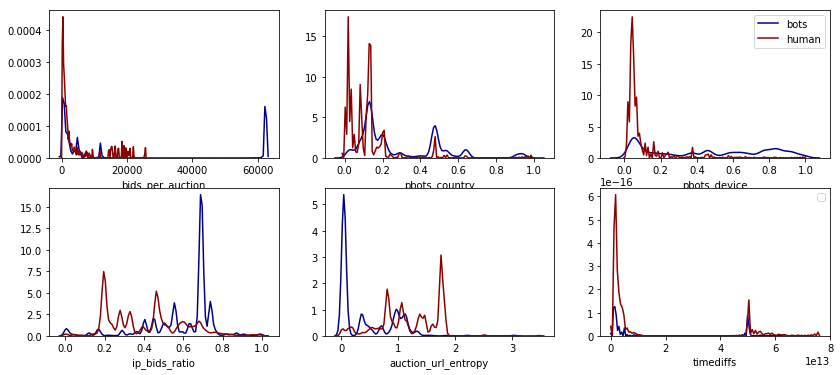

In [8]:
bots = bid.loc[bid.outcome==1]
human = bid.loc[bid.outcome==0]

fig, axes = plt.subplots(2, 3, figsize=(14, 6), sharex=False)
sns.distplot(bots['bids_per_auction'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])
sns.distplot(human['bids_per_auction'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])

sns.distplot(bots['pbots_country'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1.5},ax=axes[0, 1])
sns.distplot(human['pbots_country'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5},ax=axes[0,1])

sns.distplot(bots['pbots_device'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', label = 'bots',
             kde_kws={'linewidth': 1.5},ax=axes[0,2])
sns.distplot(human['pbots_device'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', label = 'human',
             kde_kws={'linewidth': 1.5},ax=axes[0,2])

sns.distplot(bots['ip_bids_ratio'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1.5},ax=axes[1,0])
sns.distplot(human['ip_bids_ratio'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5},ax=axes[1,0])

sns.distplot(bots['auction_url_entropy'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1.5},ax=axes[1,1])
sns.distplot(human['auction_url_entropy'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5},ax=axes[1,1])

sns.distplot(bots['timediffs'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1.5},ax=axes[1,2])
sns.distplot(human['timediffs'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5},ax=axes[1,2])
plt.legend(['bots','human'])
plt.show()

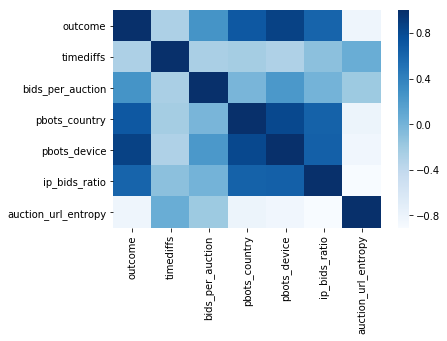

In [34]:
corr_matrix = bids.corr()
## Plot the correlation matrix for the numerical values
sns.heatmap(corr_matrix.corr(), 
        xticklabels=corr_matrix.corr().columns,
        yticklabels=corr_matrix.corr().columns,
           cmap="Blues",
           fmt='d')

In [36]:
# add some interpretation about the above two plots 
# and justify why we need to ignore the variable timediff

Fit scikit-learn model
----

### Split Train and Test set

In [37]:
y = bid['outcome']
X = bid.iloc[:,-5:]
bid_train, bid_test= train_test_split(bid, test_size=0.2)

## Under sampling

In [38]:
bots_train = bid_train.loc[bid_train.outcome == 1]
human_train = bid_train.loc[bid_train.outcome == 0]
human_sample = human_train.sample(n=len(bots_train))
bid_train_balance = pd.concat([bots_train,human_sample])

y_train = bid_train_balance['outcome']
X_train = bid_train_balance.iloc[:,-5:]
y_test = bid_test['outcome']
X_test = bid_test.iloc[:,-5:]

### First Model : Decision Tree

In [172]:
clf = tree.DecisionTreeClassifier()
param_grid = { 
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(3,6),
    'max_leaf_nodes':range(10,15),
    'min_samples_split':range(2,6)
}

clf_cv = GridSearchCV(estimator=clf, 
                      param_grid=param_grid, 
                      cv=5)
clf_cv.fit(X_train, y_train)
print(clf_cv.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_split': 2}


In [173]:
# fit the model
# Decision Tree
kwargs_regularize = dict(criterion='gini',
                         max_depth = 5,
                         max_leaf_nodes=14, 
                         min_samples_split=2)
clf = tree.DecisionTreeClassifier(**kwargs_regularize)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Tree Visualization

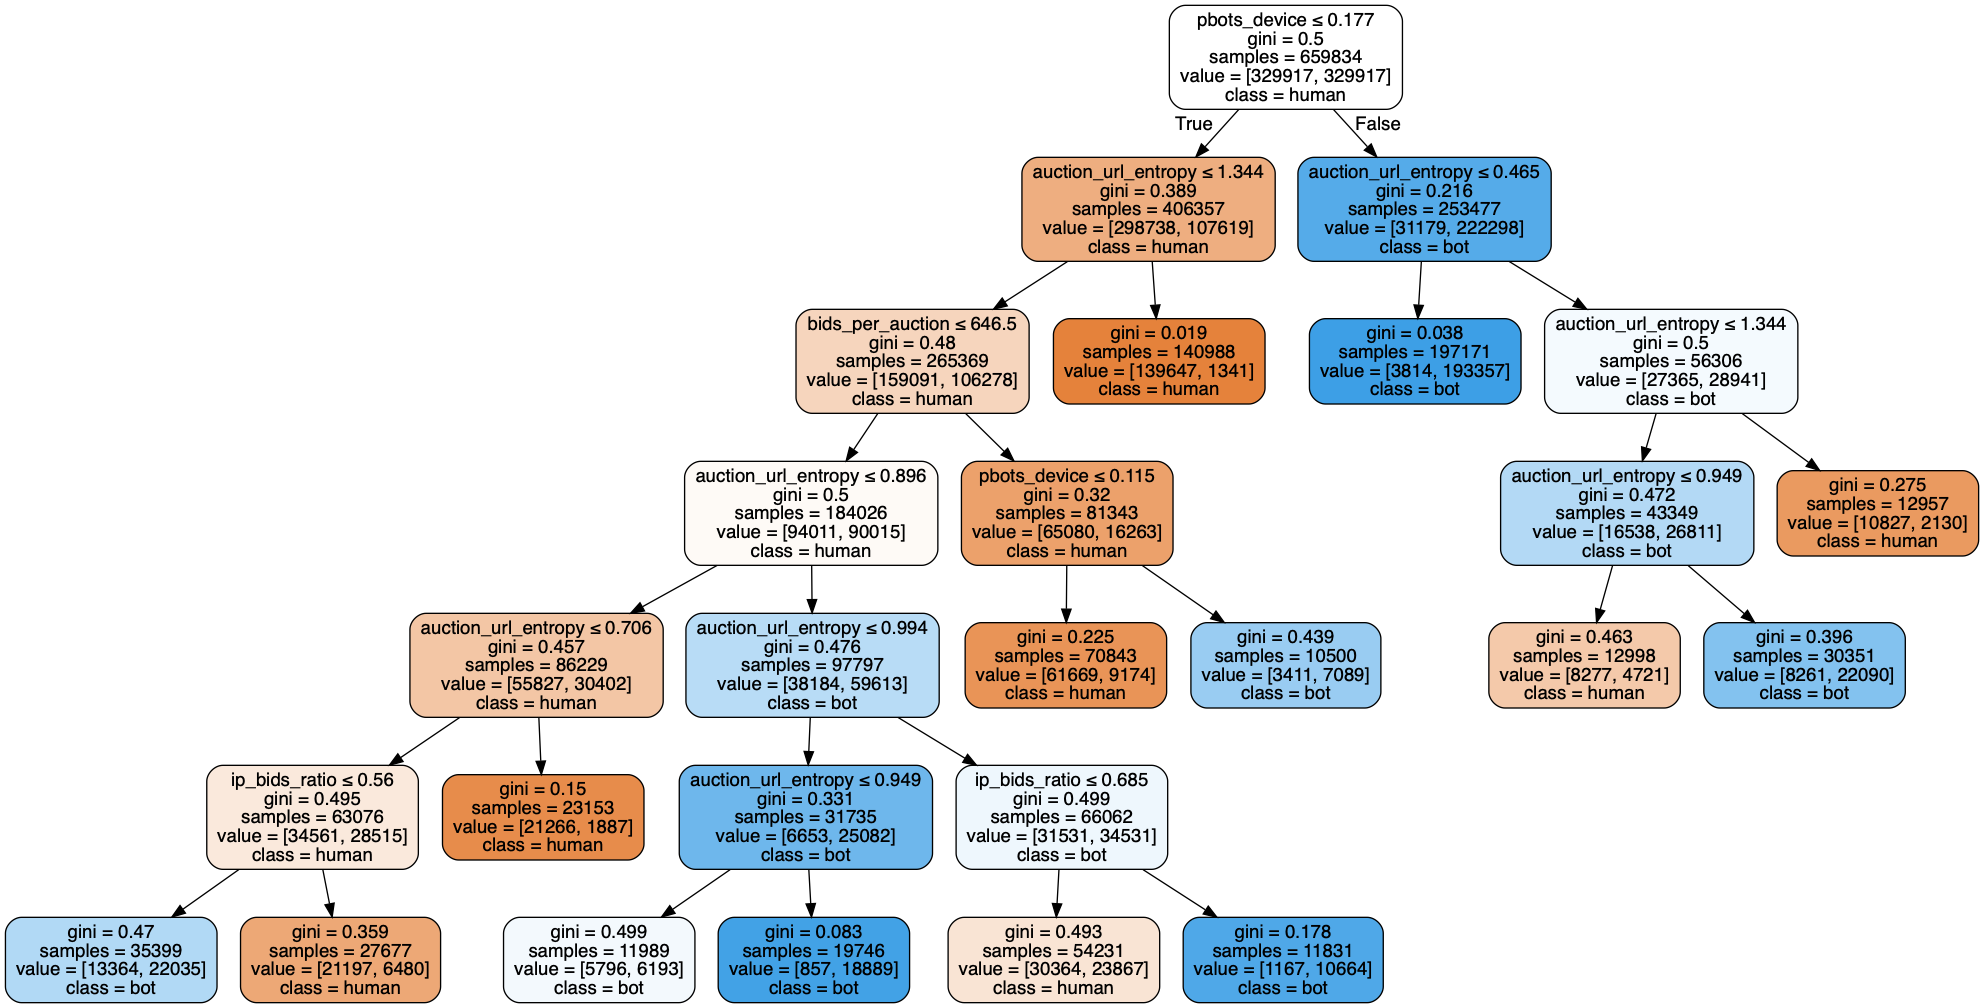

In [174]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
                         filled=True, rounded=True,
                     feature_names=X.columns.values,
                     class_names = ['human','bot'],
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [182]:
graph.write_png("tree.png")

True

Evaluation Metric
----

In [160]:
# predict
y_dt_pred = clf.predict(X_test)

### Accuracy

In [162]:
# accuracy score
print(f"Decision Tree Accuracy: {accuracy_score(y_dt_pred, y_test):.3f}")

Decision Tree Accuracy: 0.883


### Pecision vs Recall

In [164]:
print('Classification Report of Model 1 Decision Tree')
print(classification_report(y_test, y_dt_pred))

Classification Report of Model 1 Decision Tree
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93    531469
         1.0       0.54      0.85      0.66     82236

   micro avg       0.88      0.88      0.88    613705
   macro avg       0.76      0.87      0.80    613705
weighted avg       0.92      0.88      0.89    613705



### AUC

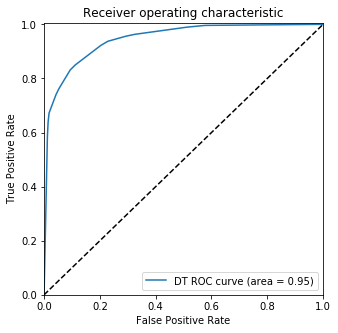

In [165]:
# Plot ROC in one graph
import seaborn as sns
import matplotlib.pyplot as plt
y_dt_score = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _dt = roc_curve(y_test, y_dt_score)
roc_dt_auc = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(5,5))
plt.plot(fpr_dt, tpr_dt, label='DT ROC curve (area = %0.2f)' % roc_dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_dt_auc.png')

## Random Forest

In [82]:
rf= RandomForestClassifier(n_estimators=50)
param_grid = { 
    'max_depth': range(3,6),
    'max_leaf_nodes' : range(8,12),
    'max_features':['sqrt','auto','log2']
}

rf_cv = GridSearchCV(estimator=rf, 
                      param_grid=param_grid, 
                      cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

{'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 11}


In [154]:
rf= RandomForestClassifier(n_estimators=100,max_depth=5,
                           max_leaf_nodes=11,max_features='log2', 
                                bootstrap=True,oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=11,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

## Evaluation Metric

### Accuracy

In [155]:
y_rf_pred = rf.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_rf_pred, y_test):.3f}")

Decision Tree Accuracy: 0.910
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95    531469
         1.0       0.61      0.88      0.72     82236

   micro avg       0.91      0.91      0.91    613705
   macro avg       0.80      0.90      0.83    613705
weighted avg       0.93      0.91      0.92    613705



### Precision vs. Recall

In [ ]:
print(classification_report(y_test,y_rf_pred))

### AUC

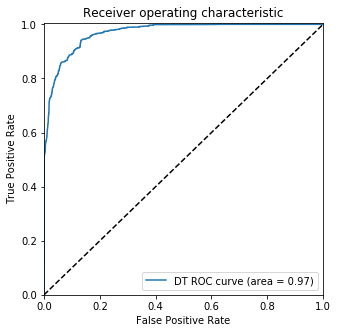

In [156]:
# Plot ROC in one graph
y_rf_score = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test, y_rf_score)
roc_rf_auc = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(5,5))
plt.plot(fpr_rf, tpr_rf, label='DT ROC curve (area = %0.2f)' % roc_rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_rf_auc.png')

## Gradient Boosting

In [66]:
gb = GradientBoostingClassifier(n_estimators=10)
param_grid = { 
    'max_depth': range(3,6),
    'max_leaf_nodes' : range(8,11)
}

gb_cv = GridSearchCV(estimator=gb, 
                      param_grid=param_grid, 
                      cv=5)
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)

{'max_depth': 5, 'max_leaf_nodes': 9}


In [150]:
gb = GradientBoostingClassifier(n_estimators=100,max_depth=5,max_features='sqrt',
                                 max_leaf_nodes=9)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=9,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

## Evaluation Metrics

### Accuracy

In [151]:
y_gb_pred = gb.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_gb_pred, y_test):.3f}")

Decision Tree Accuracy: 0.979
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    531469
         1.0       0.88      0.98      0.93     82236

   micro avg       0.98      0.98      0.98    613705
   macro avg       0.94      0.98      0.96    613705
weighted avg       0.98      0.98      0.98    613705



### Precison vs. Recall

In [ ]:
print(classification_report(y_test,y_gb_pred))

### AUC

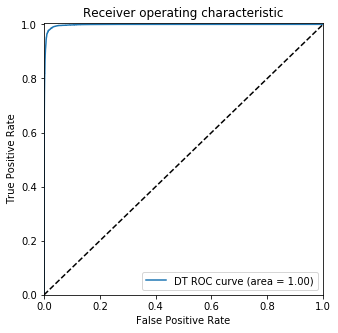

In [152]:
# Plot ROC in one graph
y_gb_score = gb.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, _gb = roc_curve(y_test, y_gb_score)
roc_gb_auc = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(5,5))
plt.plot(fpr_gb, tpr_gb, label='DT ROC curve (area = %0.2f)' % roc_gb_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_gb_auc.png')

## Compare Different Models

In [125]:
from sklearn import metrics
dt_metrics = [metrics.accuracy_score(y_test,y_dt_pred),metrics.precision_score(y_test,y_dt_pred),
     metrics.recall_score(y_test,y_dt_pred),metrics.f1_score(y_test,y_dt_pred),
     metrics.roc_auc_score(y_test,y_dt_pred)]
rf_metrics = [metrics.accuracy_score(y_test,y_rf_pred),metrics.precision_score(y_test,y_rf_pred),
     metrics.recall_score(y_test,y_rf_pred),metrics.f1_score(y_test,y_rf_pred),
     metrics.roc_auc_score(y_test,y_rf_pred)]
gb_metrics = [metrics.accuracy_score(y_test,y_gb_pred),metrics.precision_score(y_test,y_gb_pred),
     metrics.recall_score(y_test,y_gb_pred),metrics.f1_score(y_test,y_gb_pred),
     metrics.roc_auc_score(y_test,y_gb_pred)]

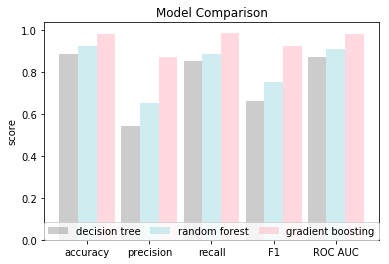

In [148]:
fig, ax = plt.subplots()
index = np.arange(5)
width = 0.3
b1 = plt.bar(index, dt_metrics, width, alpha=0.4, color='grey', label='decision tree')
b2 = plt.bar(index+width, rf_metrics, width, alpha=0.6, color='powderblue', label='random forest')
b3 = plt.bar(index+2*width, gb_metrics, width, alpha=0.6, color='pink', label='gradient boosting')
plt.title('Model Comparison')
plt.ylabel('score')
plt.xticks(index+width,('accuracy','precision','recall','F1','ROC AUC'))
plt.legend(loc=8,ncol=3, mode="expand", borderaxespad=0.)
plt.show()
fig.savefig('model_comparison.png')